# Trained DQN test

In [152]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *
import numpy as np

## graph

In [153]:
result_data = 'G513_0214_2_best/log_last0214_2.csv'
dqn_data = '0211/log_last0211.csv'
avg_delay = 'G513_0214_2_best/avg_delay_last0214_2.csv'
spq = '0306/log_last0306.csv'
epsilon_max = 1 

In [154]:
#the result data frame has [episode_num, duration, final step, score, epsilon, a minimum of average loss]
df = pd.read_csv(result_data).drop('Unnamed: 0',axis=1)
df_dqn = pd.read_csv(dqn_data).drop('Unnamed: 0',axis = 1)
df_spq = pd.read_csv(spq).drop('Unnamed: 0',axis=1)
epsilon_ = df['Epsilon'] < epsilon_max
df = df[epsilon_].reset_index(drop=True,inplace=False)
df

,Episode,Duration,Slots,Score,Epsilon,min_loss,p1,p2
0,1,0.1254,209,17.7,0.999750,259.047852,14,93
1,2,0.1170,195,15.0,0.999500,146.657883,9,91
2,3,0.1098,183,15.4,0.999250,98.281464,8,100
3,4,0.1116,186,13.3,0.999000,83.098740,5,94
4,5,0.1188,198,15.1,0.998751,94.671356,11,82
...,...,...,...,...,...,...,...,...
19994,19995,0.0990,165,30.2,0.010000,0.005443,40,88
19995,19996,0.0978,163,30.0,0.010000,0.004475,39,91
19996,19997,0.0864,144,29.7,0.010000,0.005099,40,83
19997,19998,0.0846,141,30.1,0.010000,0.005090,38,97


In [155]:
df_ = pd.read_csv(avg_delay)
df_

,Unnamed: 0,Episode,p1_q,p2_q,p1_e,p2_e
0,0,0,0.005910,0.015648,0.006795,0.038544
1,1,1,0.007110,0.014838,0.008430,0.037824
2,2,2,0.006570,0.015648,0.007695,0.038478
3,3,3,0.008775,0.010314,0.009795,0.033348
4,4,4,0.008280,0.014160,0.009330,0.037044
...,...,...,...,...,...,...
19995,19995,19995,0.001470,0.019152,0.002685,0.042084
19996,19996,19996,0.001605,0.018426,0.002670,0.042102
19997,19997,19997,0.001620,0.019134,0.002550,0.042888
19998,19998,19998,0.001890,0.017952,0.003330,0.041298


In [156]:
x=range(int(len(df['Episode'])))
y=df['Epsilon']
y2=df['Score']
y3=df['min_loss']
y4=df['p1']
y5=df['p2']

#delay
y8=df_['p1_q']
y9=df_['p2_q']
y10=df_['p1_e']
y11=df_['p2_e']

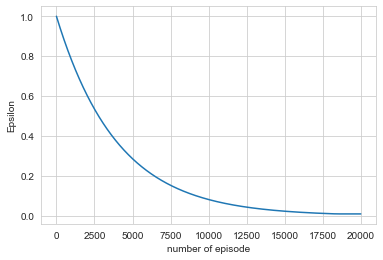

In [160]:
plt.plot(x,y)
plt.xlabel('number of episode')
plt.ylabel('Epsilon')
plt.savefig('Epsilon.png')

Text(0, 0.5, 'Score')

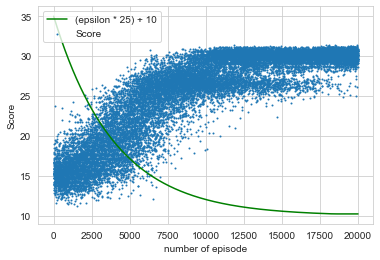

In [161]:
plt.scatter(x,y2, s=1, label='Score')
plt.plot(x,y*25+10, c='g', label = '(epsilon * 25) + 10')
plt.legend(loc='upper left')
plt.xlabel('number of episode')
plt.ylabel('Score')

(10.0, 35.0)

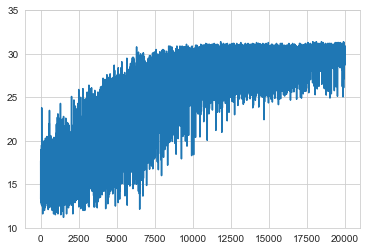

In [162]:
plt.plot(x,y2, label='sum of reward')
plt.ylim((10,35))

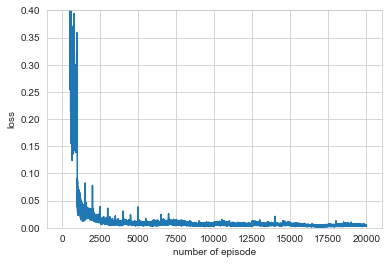

In [165]:
plt.ylim((0,0.4))
plt.plot(x,y3)
#plt.plot(x,y)
plt.xlabel('number of episode')
plt.ylabel('loss')
plt.savefig('lossddqn.png')

Text(0, 0.5, 'loss')

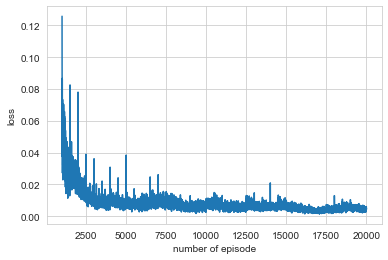

In [166]:
# plt.ylim((0,0.4))
plt.plot(x[1000:],y3[1000:])
#plt.plot(x,y)
plt.xlabel('number of episode')
plt.ylabel('loss')

## 이동평균, fill between

In [194]:
ws = 100
score = df['Score']
roll_mean=list(score.rolling(window=ws).mean())
roll_ = roll_mean[ws:]
X = range(len(roll_))

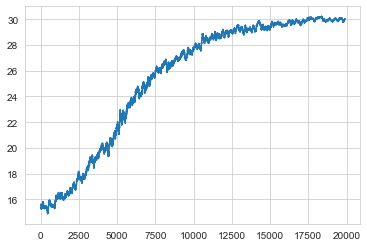

In [195]:
plt.plot(X,roll_)

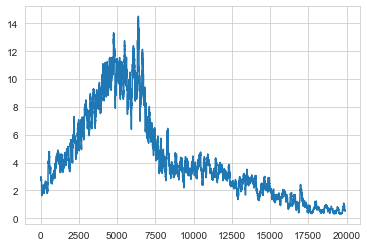

In [196]:
roll_var = list(score.rolling(window=ws).var())
roll_std = list(score.rolling(window=ws).std())
roll_var = roll_var[ws:]
roll_std = roll_std[ws:]
plt.plot(X,roll_var)

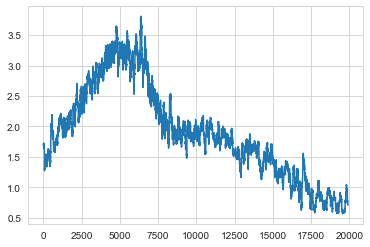

In [197]:
plt.plot(X,roll_std)

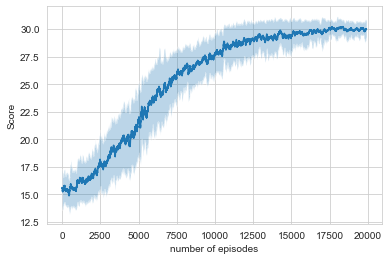

In [198]:
plt.plot(X, roll_)
plt.xlabel('number of episodes')
plt.ylabel('Score')
error1 = np.array(roll_) + np.array(roll_std)
error2 = np.array(roll_) - np.array(roll_std)
plt.fill_between(X, error1, error2, alpha = .3)

# result analysis

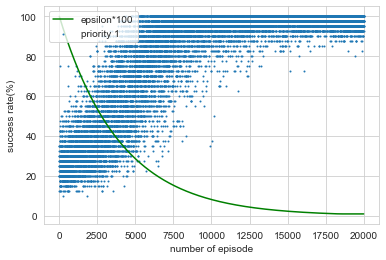

In [172]:
#success rate 
plt.scatter(x,y4/40 * 100,  s=1,  label='priority 1')
#plt.scatter(x,y5/100 * 100, s=1, label='priority 2')
plt.plot(x,y*100, c='g', label = 'epsilon*100')

plt.xlabel('number of episode')
plt.ylabel('success rate(%)')
plt.legend(loc='upper left')

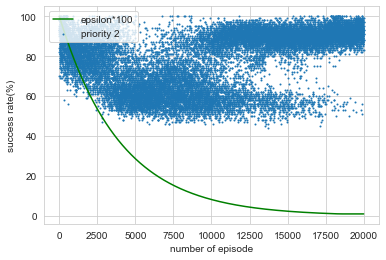

In [173]:
#success rate 
#plt.scatter(x,y4/40 * 100,  s=1,  label='priority 1')
plt.scatter(x,y5/100 * 100, s=1, label='priority 2')
plt.plot(x,y*100, c='g', label = 'epsilon*100')

plt.xlabel('number of episode')
plt.ylabel('success rate(%)')
plt.legend(loc='upper left')

In [174]:
len(x)

19999

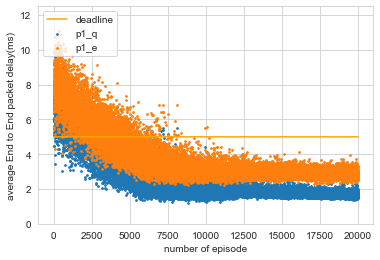

In [175]:
#delay
plt.ylim((0,12.5))

plt.scatter(range(20000),y8*1000,  s=3,  label='p1_q')
plt.scatter(range(20000),y10*1000,  s=3,  label='p1_e')

plt.plot(range(20000),[5 for _ in range(20000)], c ='orange', label = 'deadline')
plt.xlabel('number of episode')
#cb=plt.colorbar(label = 'priority')
#cb.set_ticks([0,1])
plt.ylabel('average End to End packet delay(ms)')
plt.legend(loc='upper left')

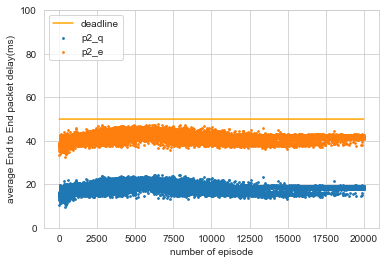

In [199]:
#delay
plt.ylim((0,100))

plt.scatter(range(20000),y9*1000,  s=3,  label='p2_q')
plt.scatter(range(20000),y11*1000,  s=3,  label='p2_e')

plt.plot(range(20000),[50 for _ in range(20000)], c ='orange', label = 'deadline')
plt.xlabel('number of episode')
#cb=plt.colorbar(label = 'priority')
#cb.set_ticks([0,1])
plt.ylabel('average End to End packet delay(ms)')
plt.legend(loc='upper left')

## DQN과 비교

In [200]:
x_=range(int(len(df_dqn['Episode'])))
y_=df_dqn['Epsilon']
y2_=df_dqn['Score']
y3_=df_dqn['min_loss']
xx = range(int(len(df_spq['Episode'])))
yy = df_spq['Score']
# y4=df['p1']
# y5=df['p2']

Text(0, 0.5, 'Score')

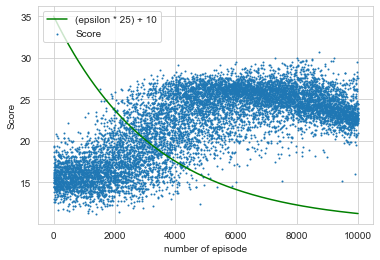

In [201]:
plt.scatter(x_,y2_, s=1, label='Score')
plt.plot(x_,y_*25+10, c='g', label = '(epsilon * 25) + 10')
plt.legend(loc='upper left')
plt.xlabel('number of episode')
plt.ylabel('Score')

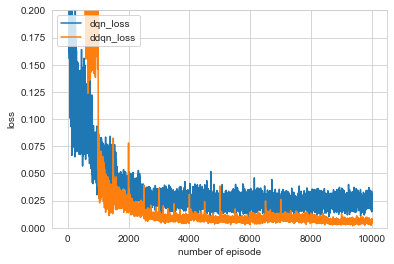

In [202]:
plt.ylim((0,0.2))
plt.plot(x_,y3_, label = 'dqn_loss')
plt.plot(x_,y3[:10000], label = 'ddqn_loss' )

plt.xlabel('number of episode')
plt.ylabel('loss')

plt.legend(loc='upper left')
plt.savefig('lossdqnddqn.png')

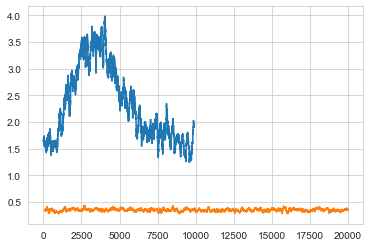

In [203]:
#wsd = 10
score_dqn = df_dqn['Score']
dqn_mean=list(score_dqn.rolling(window=ws).mean())
dqn_ = dqn_mean[ws:]
X_ = range(len(dqn_))
dqn_var = list(score_dqn.rolling(window=ws).var())
dqn_std = list(score_dqn.rolling(window=ws).std())
dqn_var = dqn_var[ws:]
dqn_std = dqn_std[ws:]
plt.plot(X_,dqn_std)

score_spq = df_spq['Score']
spq_mean = list(score_spq.rolling(window=ws).mean())
spq_ = spq_mean[ws:]
Xx = range(len(spq_))
spq_std = list(score_spq.rolling(window=ws).std())
plt.plot(xx,spq_std)

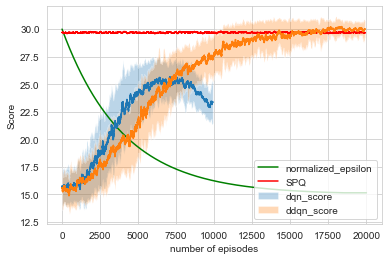

In [204]:
plt.plot(x,y*15+15, c='g', label = 'normalized_epsilon')
plt.plot(X_, dqn_)
plt.plot(Xx,spq_, c='r', label = 'SPQ')
plt.xlabel('number of episodes')
plt.ylabel('Score')
error1_ = np.array(dqn_) + np.array(dqn_std)
error2_ = np.array(dqn_) - np.array(dqn_std)
plt.plot(X, roll_)
plt.fill_between(X_, error1_, error2_, alpha = .3,label = 'dqn_score')
plt.fill_between(X, error1, error2, alpha = .3,label='ddqn_score')
plt.legend(loc='lower right')
plt.savefig('score.png')

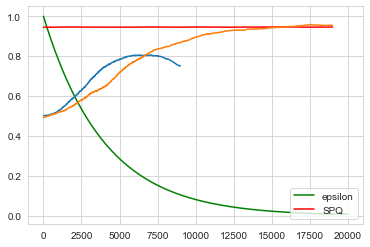

In [27]:
max = 31.4
a=list(map(lambda x: x/max, dqn_))
b=list(map(lambda x: x/max, spq_))
c=list(map(lambda x: x/max, roll_))
e1 = np.array(a) + np.array(dqn_std)
e2 = np.array(a) - np.array(dqn_std)
e_1 = np.array(b[:1]) + np.array(roll_std)
e_2 = np.array(b[:1]) - np.array(roll_std)

plt.plot(x,y, c='g', label = 'epsilon')
plt.plot(X_, a)
plt.plot(Xx, b, c='r', label = 'SPQ')
plt.plot(X, c)

# plt.fill_between(X_, e1, e2, alpha = .3,label = 'dqn_score')
# plt.fill_between(X, e_1, e_2, alpha = .3,label='ddqn_score')
plt.legend(loc='lower right')

---------

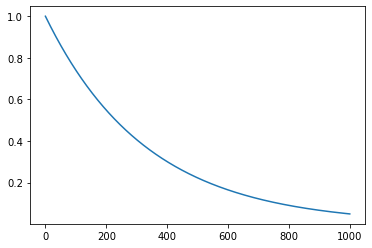

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,1000)
y = 1*(0.997**x)
plt.plot(x,y)
plt.show()

## model test

In [32]:
from tensorflow.keras.utils import plot_model

In [34]:
md=keras.models.load_model("[19999]0.004812348634004593_last.h5")
md.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


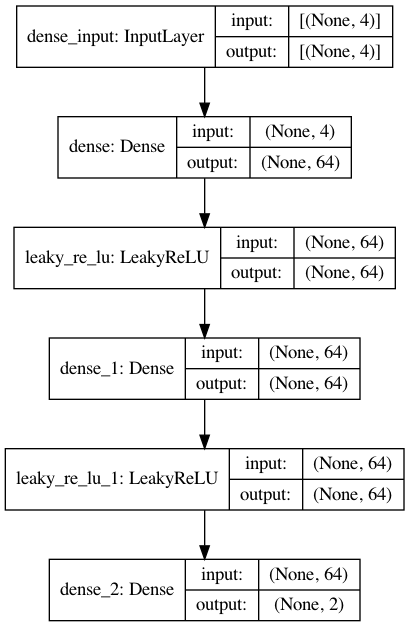

In [37]:

plot_model(md, to_file='model.png',show_shapes=True)

------

## box plot

In [134]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import numpy as np



# 화면 스타일 설정하기

sns.set_style("whitegrid")

ge = 'test/extract.csv'
gf = 'test/fifo.csv'
ga = 'test/apply.csv'

ge = pd.read_csv(ge).drop('Unnamed: 0',axis=1)
gf = pd.read_csv(gf).drop('Unnamed: 0',axis=1)
ga = pd.read_csv(ga).drop('Unnamed: 0',axis=1)


In [135]:
print(np.mean(ge['Score']))
print(np.mean(ga['Score']))
print(np.mean(gf['Score']))

29.918499999999998
30.079999999999995
29.66999999999999


In [136]:
ge_=list(ge['Score'])
ga_=list(ga['Score'])
gf_=list(gf['Score'])
score_list = ge_+ga_+gf_
max_ = np.max(score_list)
min_ = np.min(score_list)
# max_ = 31.4
# min_ = 0
mm = max_ - min_
ge__ = list(map(lambda x : (x - min_)/mm, ge_))
gf__ = list(map(lambda x : (x - min_)/mm, gf_))
ga__ = list(map(lambda x : (x - min_)/mm, ga_))
gf.insert(0,'norm_score', gf__)
gf.insert(0,'type', 'SPQ')
ge.insert(0,'norm_score', ge__)
ge.insert(0,'type', 'gcl_extract')
ga.insert(0,'norm_score', ga__)
ga.insert(0,'type', 'gcl_apply')

In [139]:
data = pd.concat([gf,ge,ga])

In [140]:
data

,type,norm_score,Slots,Score,p1,p2
0,SPQ,0.697624,141,29.4,40,80
1,SPQ,0.740821,141,29.6,40,82
2,SPQ,0.848812,141,30.1,40,87
3,SPQ,0.632829,141,29.1,40,77
4,SPQ,0.805616,141,29.9,40,85
...,...,...,...,...,...,...
95,gcl_apply,1.000000,141,30.8,40,94
96,gcl_apply,0.935205,141,30.5,40,91
97,gcl_apply,0.892009,141,30.3,40,89
98,gcl_apply,0.740821,141,29.6,40,82


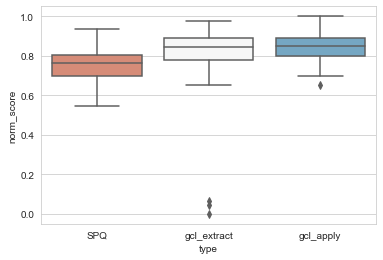

In [144]:
sns.boxplot(x = "type", y = "norm_score", data = data, palette = "RdBu")

plt.savefig('botplot.png') 

In [145]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import numpy as np



# 화면 스타일 설정하기

sns.set_style("whitegrid")

ge = 'test/extract.csv'
gf = 'test/fifo.csv'
ga = 'test/apply.csv'

ge = pd.read_csv(ge).drop('Unnamed: 0',axis=1)
gf = pd.read_csv(gf).drop('Unnamed: 0',axis=1)
ga = pd.read_csv(ga).drop('Unnamed: 0',axis=1)

ge_=list(ge['Score'])
ga_=list(ga['Score'])
gf_=list(gf['Score'])
score_list = ge_+ga_+gf_
# max_ = np.max(score_list)
# min_ = np.min(score_list)
max_ = 31.4
min_ = 0
mm = max_ - min_
ge__ = list(map(lambda x : (x - min_)/mm, ge_))
gf__ = list(map(lambda x : (x - min_)/mm, gf_))
ga__ = list(map(lambda x : (x - min_)/mm, ga_))
ge.insert(0,'norm_score', ge__)
ge.insert(0,'type', 'gcl_extract')
gf.insert(0,'norm_score', gf__)
gf.insert(0,'type', 'SPQ')
ga.insert(0,'norm_score', ga__)
ga.insert(0,'type', 'gcl_apply')
data = pd.concat([gf,ge,ga])

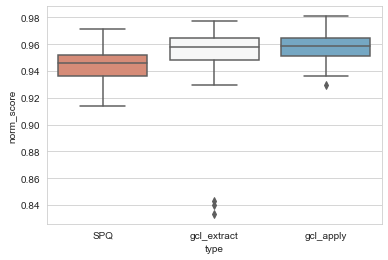

In [146]:
sns.boxplot(x = "type", y = "norm_score", data = data, palette = "RdBu")

plt.savefig('boxplot_norm2.png') 

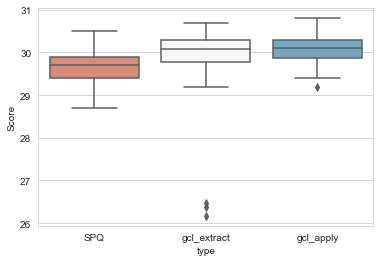

In [188]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import numpy as np



# 화면 스타일 설정하기

sns.set_style("whitegrid")

ge = 'test/extract.csv'
gf = 'test/fifo.csv'
ga = 'test/apply.csv'

ge = pd.read_csv(ge).drop('Unnamed: 0',axis=1)
gf = pd.read_csv(gf).drop('Unnamed: 0',axis=1)
ga = pd.read_csv(ga).drop('Unnamed: 0',axis=1)

ge_=list(ge['Score'])
ga_=list(ga['Score'])
gf_=list(gf['Score'])
score_list = ge_+ga_+gf_
# max_ = np.max(score_list)
# min_ = np.min(score_list)
# max_ = 31.4
# min_ = 0
# mm = max_ - min_
# ge__ = list(map(lambda x : (x - min_)/mm, ge_))
# gf__ = list(map(lambda x : (x - min_)/mm, gf_))
# ga__ = list(map(lambda x : (x - min_)/mm, ga_))
# ge.insert(0,'norm_score', ge__)
ge.insert(0,'type', 'gcl_extract')
# gf.insert(0,'norm_score', gf__)
gf.insert(0,'type', 'SPQ')
# ga.insert(0,'norm_score', ga__)
ga.insert(0,'type', 'gcl_apply')
data = pd.concat([gf,ge,ga])
sns.boxplot(x = "type", y = "Score", data = data, palette = "RdBu")

plt.savefig('boxplot_norm3.png') 

-----------

In [ ]:
import warnings
warnings.filterwarnings(action='ignore') 

cc_act = action_list[np.argmax(cc.predict(state1))]
ad_act = action_list[np.argmax(ad.predict(state2))]
vd_act = action_list[np.argmax(ad.predict(state3))]
be_act = action_list[np.argmax(ad.predict(state4))]
# a = format(np.argmax(cc.predict(state1)),'0'+str(10)+'b')
# b = format(np.argmax(ad.predict(state2)),'0'+str(10)+'b')
# c = format(np.argmax(vd.predict(state3)),'0'+str(10)+'b')
# d = format(np.argmax(be.predict(state4)),'0'+str(10)+'b')
print(cc_act)
print(ad_act)
print(vd_act)
print(be_act)

In [ ]:
gcl = [cc_act,ad_act,vd_act,be_act]
a = np.array([list(map(int,g)) for g in gcl])

In [ ]:
a[:,2]

In [ ]:
#state=np.array([0,0,0,100]).reshape(-1,4)
state1 = np.array([1,1]).reshape(1,2)
state2 = np.array([0.3,0.3]).reshape(1,2)
state3 = np.array([0.9,0.9]).reshape(1,2)
state4 = np.array([0.9,0.9]).reshape(1,2)

In [ ]:
sim = pd.read_csv('switchlog0818_generated.csv')
sim = sim.drop('Unnamed: 0',axis=1)
generated_time=list(sim['time'])
generated_time=list(map(float,generated_time))
A=sim.loc[:,['Unnamed: 6']].values.tolist()
A_=list(map(str,A))
A_[3]
B = [float(a[14:33]) for a in A_]
c=[B[i]-generated_time[i] for i in range(len(B))]
sim.loc[:,'delay']=c

In [ ]:
sim

In [ ]:
one = sim['class']==1
one = sim[one]
two = sim['class'] ==2
two = sim[two]
th = sim['class'] ==3
th = sim[th]

In [ ]:
one

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame
from pandas import Series

#plt.subplot(311)
# plt.ylim(-0.1,0.1)
#plt.scatter(range(len(one['delay'])),list(one['delay']))
#plt.subplot(312)
# plt.ylim(-0.1,0.1)
#plt.scatter(range(len(two['delay'])),list(two['delay']))
#plt.subplot(313)
# plt.ylim(-0.1,0.1)
plt.scatter(range(len(th['delay'])),list(th['delay']))
#plt.show()

In [ ]:
list(th['delay'])

In [ ]:

r1=range(len(one['delay']))
r2=range(len(two['delay']))
r3=range(len(th['delay']))
plt.scatter(r1,list(one['delay']),list(two['delay']),'r-')
#plt.scatter(r1,list(one['delay']),r2,list(two['delay']),r3,list(th['delay']))


In [ ]:
#len(one['delay'])
a=range(40)
#list(one['delay'])
a[3]

In [ ]:
import numpy as np
print(np.mean(one['delay']))
print(np.mean(two['delay']))
#print(np.mean(th['delay']))      

In [ ]:
np.mean(th['delay'])

In [ ]:
np.mean(sim['delay'])

----------

# Class간 객체 공유

In [ ]:
from a import A
from b import B

a = A()
b = B()

In [ ]:
a.pr(22)
a.pr(1)
a.pr(3)

In [ ]:
a.ex = sorted(a.ex, key=lambda flow: flow.type_) #class별 정렬까지

In [ ]:
a.ex

A(env)에서 B(node)를 호출해 정보를 쓰고, 다시 출력했더니 쓴 정보(type, num = 1)이 그대로 나오는것을 확인 

# 병렬 프로세스 처리

In [ ]:
import simpy 
import numpy as np 

## 물론 이 아래 부분을 클래스로 구현을 해도 좋지만 일단은 이해를 위해서 다 함수로 표현함 
# def subsubprocess(env):
#     ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
#     print('        subsubprocess start at {:6.2f}'.format(env.now))
#     for i in range(0, 2):
#         execution_time = np.random.triangular(left=1, right=2, mode=1)
#         yield env.timeout(execution_time)
#     print('        subsubprocess over  at {:6.2f}'.format(env.now))
def subprocess1(env,store): #flow generate process
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for _ in range(10):
        print('    subprocess1 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.put(1)
        #print ('put item',store.items)
        yield env.timeout(1/1000)
        print('    subprocess1 over  at {:6.5f}'.format(env.now))
    
def subprocess2(env,store):
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for _ in range(10):
        print('    subprocess2 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.get()
        print ('get item',store.items)
        yield env.timeout(5/1000)
        print('    subprocess2 over  at {:6.5f}'.format(env.now))
        
def subprocess3(store): #packet out process
    for _ in range(4):
        yield store.put(2)
    
    
def process(env,store, activity_lst):
    while True:
        for act in activity_lst:
            print("start {} at {:6.5f}".format(act, env.now))
            execution_time = np.random.triangular(left=3, right=10, mode=6)
            ## 모든 activity는 subprocess라고 생각한다.
            ## subprocess(env)가 종료되어야 다음 스텝으로 넘어감
            ## 즉 일종의 waiting for other process를 구현했다고 보면 됨 
            
            env.process(subprocess1(env,store))
            env.process(subprocess2(env,store))
            
            for _ in range(10):
                env.process(subprocess3(store))
                yield env.timeout(3/1000)
            print("end   {} at {:6.5f}".format(act, env.now))
            #transfer_time = np.random.triangular(left=1, right=3, mode=2)
            
            print('process instance ends')
            print('#'*30)
            print(env.now)
        return 
###########
env = simpy.Environment()
store = simpy.Store(env, capacity = 100)
process1 = process(env,store, ["act_{}".format(i) for i in range(0, 3)])
env.process(process1)
env.run(1)

In [ ]:
import simpy 
import numpy as np 

## 물론 이 아래 부분을 클래스로 구현을 해도 좋지만 일단은 이해를 위해서 다 함수로 표현함 
# def subsubprocess(env):
#     ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
#     print('        subsubprocess start at {:6.2f}'.format(env.now))
#     for i in range(0, 2):
#         execution_time = np.random.triangular(left=1, right=2, mode=1)
#         yield env.timeout(execution_time)
#     print('        subsubprocess over  at {:6.2f}'.format(env.now))
def subprocess1(env,store):
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for i in range(0, 10):
        yield env.timeout(5/1000)
        print('    subprocess1 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.put(1)
        print ('put item',store.items)
        print('    subprocess1 over  at {:6.5f}'.format(env.now))
    
def subprocess2(env,store):
    ## process의 개별 activity는 subprocess로 구성되어 있습니다. 
    for i in range(0, 10):
        yield env.timeout(5/1000)
        print('    subprocess2 start at {:6.5f}'.format(env.now))
        #yield env.process(subsubprocess(env))
        yield store.get()
        print ('get item',store.items)
        print('    subprocess2 over  at {:6.5f}'.format(env.now))
    
def process(env, store, activity_lst):
    while True:
        for act in activity_lst:
            print("start {} at {:6.5f}".format(act, env.now))
            execution_time = np.random.triangular(left=3, right=10, mode=6)
            ## 모든 activity는 subprocess라고 생각한다.
            ## subprocess(env)가 종료되어야 다음 스텝으로 넘어감
            ## 즉 일종의 waiting for other process를 구현했다고 보면 됨 
            yield env.process(subprocess1(env,store))
            yield env.process(subprocess2(env,store))
            ##############
            print("end   {} at {:6.5f}".format(act, env.now))
            transfer_time = np.random.triangular(left=1, right=3, mode=2)
            #yield env.timeout(transfer_time)
        print('process instance ends')
        print('#'*30)
        return None
###########
env = simpy.Environment()
store = simpy.Store(env, capacity=100)
process1 = process(env, store, ["act_{}".format(i) for i in range(0, 3)])
env.process(process1)
env.run(50)

In [ ]:
npzload = np.load('1019_1_npz.npz', allow_pickle=True)

In [ ]:
delay=npzload['delay']

In [ ]:
sa = npzload['stateaction']

In [ ]:
sa[:500]